In [5]:
  #Part 1 - An economist asserts that [logged] Truck Tonnage correlates well with the S&P 500.
#1. Retrieve the data for each series
#2. Apply a log transform to the data (where appropriate).
#3. Plot the data and identify any relationships
#4. Shade areas that contain recessions
#5. Explain how the information may or may not be used

#Truck Tonnage
from google.colab import files
uploaded = files.upload()

#1. Retrieve the data for each series
#TRUCKD11
import pandas as pd
truck_data = pd.read_csv("TRUCKD11.csv")
truck_data["DATE"] = pd.to_datetime(truck_data["DATE"])
print(truck_data["TRUCKD11"])
print(truck_data["DATE"])

Saving TRUCKD11.csv to TRUCKD11.csv
0       80.3
1       79.7
2       74.1
3       72.7
4       72.9
       ...  
230    116.8
231    117.1
232    117.5
233    118.0
234    119.3
Name: TRUCKD11, Length: 235, dtype: float64
0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
230   2019-03-01
231   2019-04-01
232   2019-05-01
233   2019-06-01
234   2019-07-01
Name: DATE, Length: 235, dtype: datetime64[ns]


In [7]:
#S&P 500

from google.colab import files
uploaded = files.upload()

import pandas as pd
sp_data = pd.read_csv("SP500_from_2009.csv")
for i, data in sp_data.iterrows():
  if str(data["SP500"]) == ".":
    sp_data.at[i, "SP500"] = prev_val
  else:
    prev_val = data["SP500"]
sp_data["SP500"] = pd.to_numeric(sp_data["SP500"])
sp_data["DATE"] = pd.to_datetime(sp_data["DATE"])
print(sp_data["SP500"])
print(sp_data["DATE"])

Saving SP500_from_2009.csv to SP500_from_2009.csv
0       1106.24
1       1105.65
2       1110.63
3       1110.63
4       1091.49
         ...   
2604    3120.46
2605    3122.03
2606    3120.18
2607    3108.46
2608    3103.54
Name: SP500, Length: 2609, dtype: float64
0      2009-11-23
1      2009-11-24
2      2009-11-25
3      2009-11-26
4      2009-11-27
          ...    
2604   2019-11-15
2605   2019-11-18
2606   2019-11-19
2607   2019-11-20
2608   2019-11-21
Name: DATE, Length: 2609, dtype: datetime64[ns]


In [8]:
#2. Apply a log transform to the data (where appropriate).

import matplotlib.pyplot as plt
import numpy as np

truck_data['LOG'] = truck_data['TRUCKD11'].apply(np.log)
print(truck_data)

sp_data['LOG'] = sp_data['SP500'].apply(np.log)
print(sp_data)

          DATE  TRUCKD11       LOG
0   2000-01-01      80.3  4.385770
1   2000-02-01      79.7  4.378270
2   2000-03-01      74.1  4.305416
3   2000-04-01      72.7  4.286341
4   2000-05-01      72.9  4.289089
..         ...       ...       ...
230 2019-03-01     116.8  4.760463
231 2019-04-01     117.1  4.763028
232 2019-05-01     117.5  4.766438
233 2019-06-01     118.0  4.770685
234 2019-07-01     119.3  4.781641

[235 rows x 3 columns]
           DATE    SP500       LOG
0    2009-11-23  1106.24  7.008722
1    2009-11-24  1105.65  7.008189
2    2009-11-25  1110.63  7.012683
3    2009-11-26  1110.63  7.012683
4    2009-11-27  1091.49  6.995299
...         ...      ...       ...
2604 2019-11-15  3120.46  8.045736
2605 2019-11-18  3122.03  8.046239
2606 2019-11-19  3120.18  8.045646
2607 2019-11-20  3108.46  8.041883
2608 2019-11-21  3103.54  8.040299

[2609 rows x 3 columns]


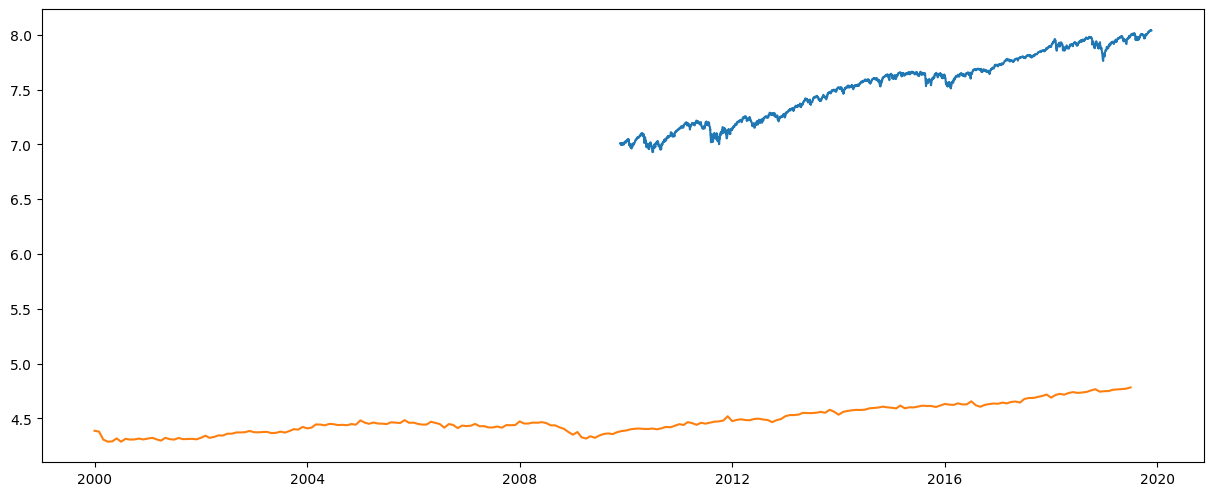

In [10]:
#3.Plot the data and identify any relationships
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(15, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(sp_data['DATE'], sp_data['LOG'])
plt.plot(truck_data['DATE'], truck_data['LOG'])

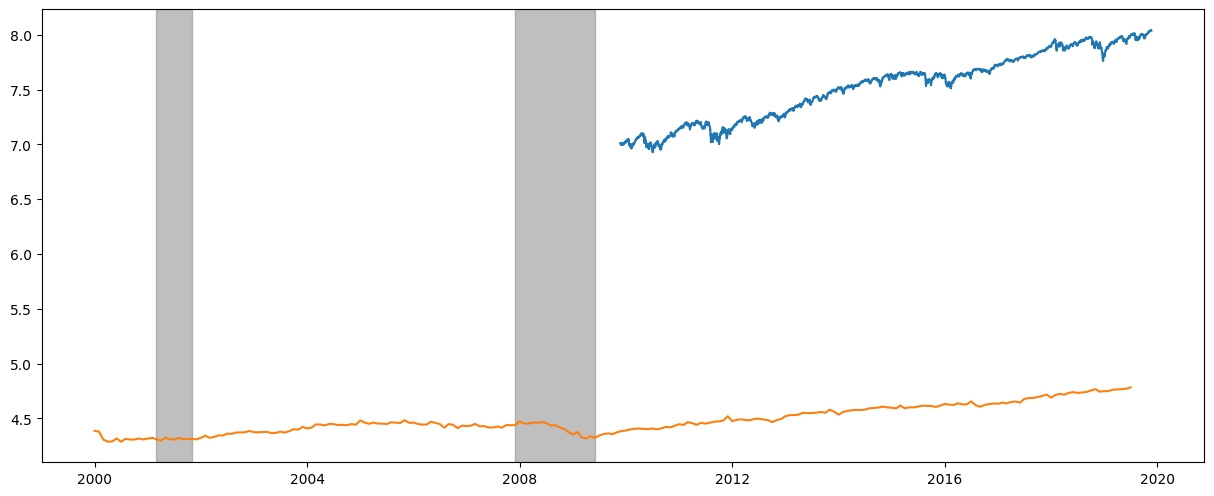

In [11]:
#4.Shade areas that contain recessions

import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(sp_data['DATE'], sp_data['LOG'])
plt.plot(truck_data['DATE'], truck_data['LOG'])
plt.axvspan(pd.Timestamp('2001-03-01 00:00:00'),pd.Timestamp('2001-11-01 00:00:00'),color ="gray",alpha=0.5)
plt.axvspan(pd.Timestamp('2007-12-01 00:00:00'),pd.Timestamp('2009-06-01 00:00:00'),color ="gray",alpha=0.5)

In [0]:
#5.Explain how the information may or may not be used
#The information may not be used because from 2000 to 2009, there are no data for the index stock.
#Truck tonnage is a reasonable proxy for the overall economy, and stock prices tend to rise as the economy grows as the chart so clearly illustrates.
#The Truck Tonnage Index declined in 2008 and is still on a nice upward path.
#Trucks represent 70% of U.S. freight and serve as a barometer of the U.S. economy. This chart shows how the U.S. stock market has increased in line with the physical size and expansion of the US economy. 
#The Truck Tonnage Index is not a leading indicator of the U.S. stock market. But the chart is very interesting because it shows how the U.S. stock market tends to follow the physical expansion and contraction of the U.S. economy.




In [0]:
Part 2 - An economist asserts that stock market direction is largely based on whether the S&P 500 Index is above/below the 200 Day Simple Moving Average (SMA).
#1. Retrieve the data for the S&P 500
#2. Create simple moving average columns for not only the 200 day SMA, but also for other popular SMAs (e.g., 20, 50, and 100)
#3. Plot the data and identify any relationships
#4. Shade areas that contain recessions
#5. Explain how the information may or may not be used



In [12]:
#1. Retrieve the data for the S&P 500
##I did in Part 1.1

#2 calculate moving averages 

sp_data["SMA_20"] = sp_data.SP500.rolling(window=20, min_periods=1).mean()
sp_data["SMA_50"] = sp_data.SP500.rolling(window=50, min_periods=1).mean()
sp_data["SMA_100"] = sp_data.SP500.rolling(window=100, min_periods=1).mean()
sp_data["SMA_200"] = sp_data.SP500.rolling(window=200, min_periods=1).mean()

print(sp_data)

           DATE    SP500       LOG  ...       SMA_50      SMA_100      SMA_200
0    2009-11-23  1106.24  7.008722  ...  1106.240000  1106.240000  1106.240000
1    2009-11-24  1105.65  7.008189  ...  1105.945000  1105.945000  1105.945000
2    2009-11-25  1110.63  7.012683  ...  1107.506667  1107.506667  1107.506667
3    2009-11-26  1110.63  7.012683  ...  1108.287500  1108.287500  1108.287500
4    2009-11-27  1091.49  6.995299  ...  1104.928000  1104.928000  1104.928000
...         ...      ...       ...  ...          ...          ...          ...
2604 2019-11-15  3120.46  8.045736  ...  3005.914200  2976.762100  2913.404950
2605 2019-11-18  3122.03  8.046239  ...  3008.786200  2978.339100  2915.466100
2606 2019-11-19  3120.18  8.045646  ...  3011.602000  2979.810800  2917.343350
2607 2019-11-20  3108.46  8.041883  ...  3013.752600  2980.937200  2919.120500
2608 2019-11-21  3103.54  8.040299  ...  3015.632000  2982.014400  2920.909550

[2609 rows x 7 columns]


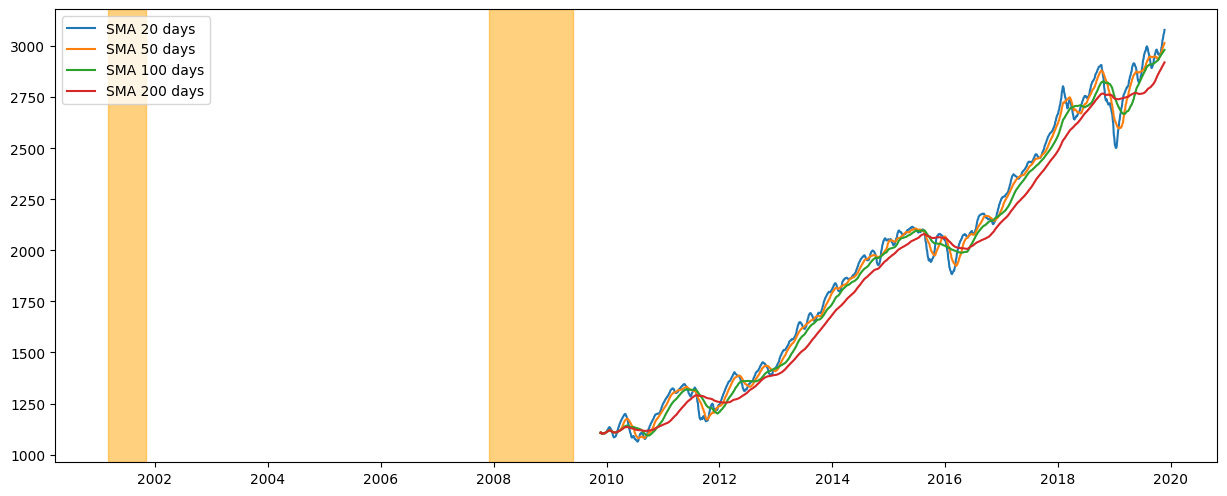

In [13]:
#3. Plot the data and identify any relationships
#4. Shade areas that contain recessions
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(15, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(sp_data['DATE'], sp_data['SMA_20'],label='SMA 20 days')
plt.plot(sp_data['DATE'], sp_data['SMA_50'],label='SMA 50 days')
plt.plot(sp_data['DATE'], sp_data['SMA_100'],label='SMA 100 days')
plt.plot(sp_data['DATE'], sp_data['SMA_200'],label='SMA 200 days')
plt.axvspan(pd.Timestamp('2001-03-01 00:00:00'),pd.Timestamp('2001-11-01 00:00:00'),color ="orange",alpha=0.5)
plt.axvspan(pd.Timestamp('2007-12-01 00:00:00'),pd.Timestamp('2009-06-01 00:00:00'),color ="orange",alpha=0.5)
plt.legend(loc=2)
plt.show()

In [0]:
#5.Explain how the information may or may not be used

#The chart above shows SP500 with a 20-day SMA (blue line) and 50-day EMA (orange line). 
#The green line is the 100 day SMA. Using a moving average crossover would have resulted in three whipsaws before catching a good trade. 
#The 20-day SMA broke below the 50-day SMA in late 2016, but this did not last long as the 20-day moved back above. 
#This cross lasted longer, but the next bearish crossover in March 2018 occurred near late November price levels, resulting in another whipsaw.
#This bearish cross did not last long as the 20-day SMA moved back above the 50-day a few days later. 
#After three bad signals, the fourth signal foreshadowed a strong move as the stock advanced.
#It is clear that any breaks above or below 200-day moving averages line are usually regarded as important trading signals, especially when they are followed by crossovers. 
#In the chart, the 200-day moving average gives a bigger picture of a stock trend. Therefore, it is useful in identifying longer-term support. 



In [0]:
# Part 3
# Come up with your own assertion and test it  
#1.Document your hypothesis or idea
#2.Retrieve the data
#3.Highlight interesting areas
#4.Explain how the information may or may not be used


#1.Document your hypothesis or idea
#A break of the 200-day line, especially in high volume, can be a sell signal. But this is often a late signal. 
#By the time a stock goes all the way back below its 200-day line, it would have likely erased a large chunk of gains. 
#In addition, the 200-day moving average can also be used to sell while the going is still good. 
#Investors may want to start locking in profits if a stock surges 70% to 100% above its 200-day moving average. 
#This is best when accompanied by other climax sell signals.
#Overall, some stocks, after going on a long run, can also be sold when its 200-day line flattens out or turns down.



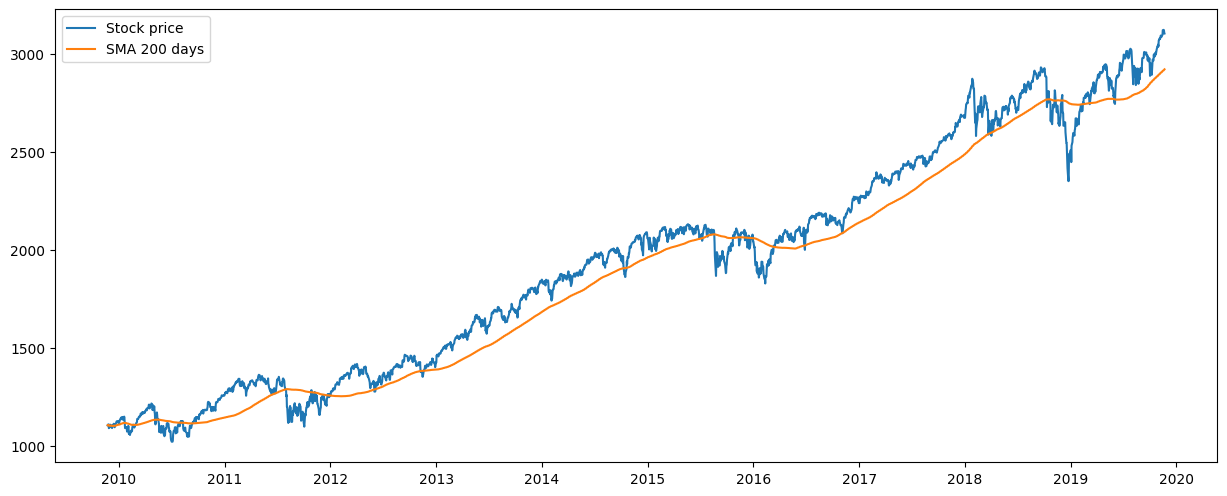

In [14]:
#2.Retrieve the data

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(15, 6), dpi=100, facecolor='w', edgecolor='k')
#plt.plot(sp_data['DATE'], sp_data['SMA_20'],label='SMA 20 days')
#plt.plot(sp_data['DATE'], sp_data['SMA_50'],label='SMA 50 days')
#plt.plot(sp_data['DATE'], sp_data['SMA_100'],label='SMA 100 days')
plt.plot(sp_data['DATE'], sp_data.SP500,label='Stock price')
plt.plot(sp_data['DATE'], sp_data.SMA_200,label='SMA 200 days')
plt.legend(loc=2)
plt.show()

In [0]:
#3.Highlight interesting areas
#4.Explain how the information may or may not be used

#The chart compares the 200 days moving average of the Stock price with the level of the S&P 500
#The chart above shows SP500 with a 200-day exponential moving average.
#This example shows just how well moving averages work when the trend is strong. 
#The 200-day SMA turned down in Dec 2011 and again in January 2012. 
#Notice that it declines to reverse the direction of this moving average. 
#These lagging indicators identify trend reversals as they occur (at best) or after they occur (at worst). 
#SP500 continued lower into Dec 2015 and then surged in July 2016. 
#The 200-day EMA did not turn up until after this surge. 
#Once it did, however, Stock price continued higher the next 5 years. 
#Moving averages work brilliantly in strong trends.
#Overall, moving averages ensure that a trader is in line with the current trend

